### Implementation of decision tree algorithm for given dataset using std libraries
 - Author - Shaikh Mohammed Ammar (191080071)
 - Date of Submission - 13<sup>th</sup> Feb 2022

---
#### *Techniques used*
 - I have used the matplotlib for plotting trees
 - used sklearn for decision-tree-classifier implementation
 - used pandas for handling the csv files as dataframes
 - implemented the decision-tree algorithm based gini-index and entropy.
 - measured the accuracy score for each.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("3.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# Label Encoder: encodes a target labels with values b/w 0 and n_classes-1
X = df.drop(['class'], axis=1)
X = pd.get_dummies(X)
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
Y = df['class']
Y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [6]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
Y  =encoder.fit_transform(Y)

print(Y)

# poisonous -> 1 , edible -> 0

[1 0 0 ... 0 1 0]


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.2, random_state=1)
print(f"X_train shape: {X_train.shape}\nX_test Shape: {X_test.shape}\nY_train Shape: {Y_train.shape}\nY_test Shape: {Y_test.shape}")

X_train shape: (1624, 117)
X_test Shape: (6500, 117)
Y_train Shape: (1624,)
Y_test Shape: (6500,)


[Text(372.0, 380.52, 'X[27] <= 0.5\nentropy = 1.0\nsamples = 1624\nvalue = [821, 803]'),
 Text(223.20000000000002, 271.8, 'X[20] <= 0.5\nentropy = 0.622\nsamples = 916\nvalue = [142, 774]'),
 Text(148.8, 163.07999999999998, 'X[53] <= 0.5\nentropy = 0.999\nsamples = 276\nvalue = [142, 134]'),
 Text(74.4, 54.360000000000014, 'entropy = 0.844\nsamples = 184\nvalue = [50, 134]'),
 Text(223.20000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 92\nvalue = [92, 0]'),
 Text(297.6, 163.07999999999998, 'entropy = 0.0\nsamples = 640\nvalue = [0, 640]'),
 Text(520.8000000000001, 271.8, 'X[100] <= 0.5\nentropy = 0.247\nsamples = 708\nvalue = [679, 29]'),
 Text(446.40000000000003, 163.07999999999998, 'X[63] <= 0.5\nentropy = 0.092\nsamples = 687\nvalue = [679, 8]'),
 Text(372.0, 54.360000000000014, 'entropy = 0.0\nsamples = 676\nvalue = [676, 0]'),
 Text(520.8000000000001, 54.360000000000014, 'entropy = 0.845\nsamples = 11\nvalue = [3, 8]'),
 Text(595.2, 163.07999999999998, 'entropy = 0.0\n

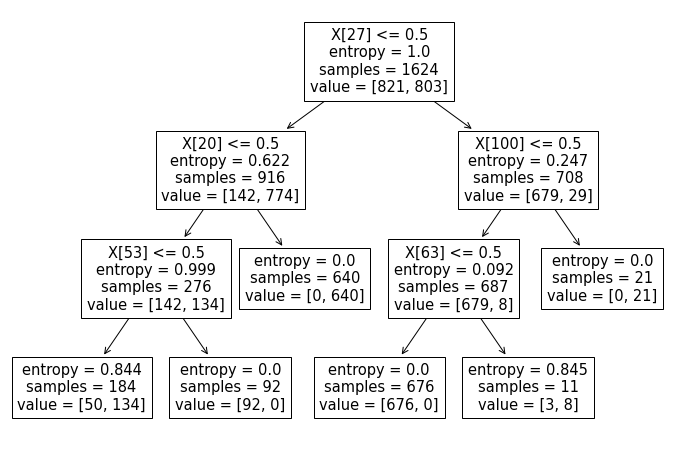

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score


clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, Y_train)

plt.figure(figsize = (12,8))
tree.plot_tree(clf_en.fit(X_train, Y_train))

Creation of Decision Tree using Gini Index

[Text(424.08, 398.64, 'X[27] <= 0.5\ngini = 0.5\nsamples = 1624\nvalue = [821, 803]'),
 Text(267.84000000000003, 326.15999999999997, 'X[53] <= 0.5\ngini = 0.262\nsamples = 916\nvalue = [142, 774]'),
 Text(178.56, 253.67999999999998, 'X[63] <= 0.5\ngini = 0.115\nsamples = 816\nvalue = [50, 766]'),
 Text(133.92000000000002, 181.2, 'X[25] <= 0.5\ngini = 0.038\nsamples = 781\nvalue = [15, 766]'),
 Text(89.28, 108.71999999999997, 'X[22] <= 0.5\ngini = 0.018\nsamples = 773\nvalue = [7, 766]'),
 Text(44.64, 36.23999999999995, 'gini = 0.0\nsamples = 766\nvalue = [0, 766]'),
 Text(133.92000000000002, 36.23999999999995, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(178.56, 108.71999999999997, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(223.2, 181.2, 'gini = 0.0\nsamples = 35\nvalue = [35, 0]'),
 Text(357.12, 253.67999999999998, 'X[74] <= 0.5\ngini = 0.147\nsamples = 100\nvalue = [92, 8]'),
 Text(312.48, 181.2, 'gini = 0.0\nsamples = 92\nvalue = [92, 0]'),
 Text(401.76, 181.2, 'gini = 0

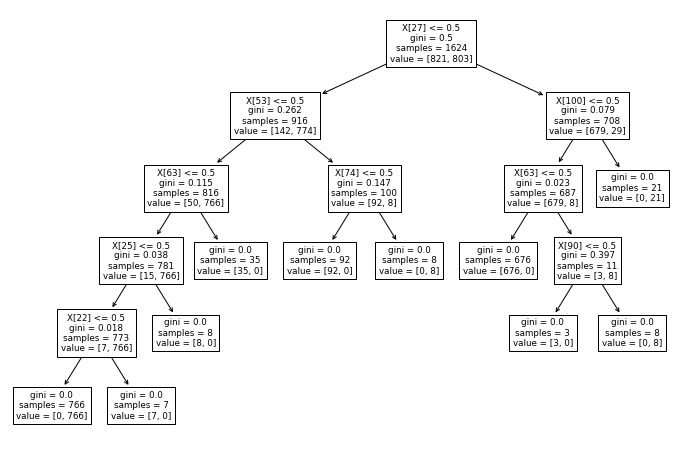

In [9]:
clf_gini= DecisionTreeClassifier(criterion='gini')

# fit the model
clf_gini.fit(X_train, Y_train)

# Plot the tree
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(X_train, Y_train))

Predictions for entropy based classification

In [10]:
# Predict the values.
Y_pred_en = clf_en.predict(X_test)

# Overfitting occurs when accuracy for training set is high and test set is very low comparing to training set.
Y_pred_train_en = clf_en.predict(X_train)

Y_pred_en

array([0, 1, 1, ..., 1, 1, 0])

In [11]:
# Predict the values using gini index
Y_pred_gini = clf_gini.predict(X_test)

Y_pred_train_gini = clf_gini.predict(X_train)

Y_pred_gini

array([0, 1, 1, ..., 1, 1, 0])

In [12]:
# Determine the accuracy score
from sklearn.metrics import accuracy_score
print(f"Model accuracy score with criterion entropy: {accuracy_score(Y_test, Y_pred_en)}")
print(f"Model accuracy score with criterion gini index: {accuracy_score(Y_test, Y_pred_gini)}")


Model accuracy score with criterion entropy: 0.9601538461538461
Model accuracy score with criterion gini index: 0.9987692307692307
